Objectif de ce code : 
Construire des groupes de pays présentant les mêmes caractéristiques (sur 2014)
Nous avons pris le parti ici de se focaliser sur des caractéristiques environnementale

- Construction de la segmentation avec la méthode K-means 
- Interprétation des clusters identifiés

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Command so that plots appear in the iPython Notebook
%matplotlib inline

#    I - DATA IMPORT

In [3]:
data = pd.read_csv('C:\\Users\\mcoug\\Dropbox\\Etude de cas iAdvize\\Data\\WDI\\WDIData.csv', sep=',')
country = pd.read_csv('C:\\Users\\mcoug\\Dropbox\\Etude de cas iAdvize\\Data\\WDI\\WDICountry.csv', sep=',')
series_1= pd.read_csv('C:\\Users\\mcoug\\Dropbox\\Etude de cas iAdvize\\Data\\WDI\\WDISeries.csv', sep=',')

#    II - PREPARATION DES DONNEES    

In [4]:
# On filtre les data sur les pays 

data_pays=data[['Country Code','Country Name','Indicator Code','2014']]

liste = ['ARB','CSS','CEB','EAR','EAS','EAP','TEA','EMU','ECS','ECA','TEC','EUU','FCS','HPC',
'HIC','IBD','IBT','IDB','IDX','IDA','LTE','LCN','LDC','LAC','TLA',' UN classification','LMY','LIC',
'LMC','MEA','MNA','TMN','MIC','NAC','INX','OED','OSS','PSS','PST','PRE','SST','SAS','TSA','SSF',
'SSA','TSS','UMC','WLD']

for i in liste:
    data_pays=data_pays[data_pays['Country Code'] != i]
    

# On garde uniquement les indicateurs qui nous intéresse pour la clusterisation
# cf. les indicateurs identifiés précédemment

list_kpis = ['EN.ATM.CO2E.GF.ZS',
'EN.CO2.ETOT.ZS',
'EN.ATM.CO2E.SF.ZS',
'EN.CO2.TRAN.ZS',
'EG.USE.COMM.CL.ZS',
'EN.CO2.BLDG.ZS',
'EN.CO2.OTHX.ZS',
'EN.ATM.CO2E.LF.ZS',
'EG.USE.CRNW.ZS']

data_pays_clustering=data_pays[data_pays["Indicator Code"]=='EN.ATM.CO2E.PC']
data_pays_clustering.drop(['Indicator Code'],axis=1,inplace=True)
data_pays_clustering.rename(columns={'2014':'EN.ATM.CO2E.PC'},inplace = True)

for i in list_kpis:
    ajout_kpi=data_pays[data_pays["Indicator Code"]==i]
    ajout_kpi.drop(['Country Name'], axis=1, inplace = True)
    data_pays_clustering = pd.merge(data_pays_clustering,ajout_kpi,on=['Country Code'],how='inner')
    data_pays_clustering.drop(['Indicator Code'],axis=1,inplace=True)
    data_pays_clustering.rename(columns={'2014':i} ,inplace = True)  

C:\Users\mcoug\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\mcoug\Anaconda3\lib\site-packages\pandas\core\frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
C:\Users\mcoug\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
data_pays_clustering.head(10)

,Country Code,Country Name,EN.ATM.CO2E.PC,EN.ATM.CO2E.GF.ZS,EN.CO2.ETOT.ZS,EN.ATM.CO2E.SF.ZS,EN.CO2.TRAN.ZS,EG.USE.COMM.CL.ZS,EN.CO2.BLDG.ZS,EN.CO2.OTHX.ZS,EN.ATM.CO2E.LF.ZS,EG.USE.CRNW.ZS
0,AFG,Afghanistan,0.299445,2.766355,NaN,44.635514,NaN,NaN,NaN,NaN,52.074766,NaN
1,ALB,Albania,1.978763,1.026299,2.912621,12.251443,59.951456,17.924206,8.495146,6.553398,67.543297,9.361381
2,DZA,Algeria,3.717410,50.820912,38.826975,0.375779,35.280241,0.042274,15.179370,2.367201,36.372349,0.011600
3,ASM,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,Andorra,5.832170,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,100.000000,NaN
5,AGO,Angola,1.291328,1.666667,19.170984,0.000000,43.989637,2.954635,28.704663,0.362694,56.012658,48.765820
6,ATG,Antigua and Barbuda,5.377649,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,100.000000,NaN
7,ARG,Argentina,4.746797,47.392070,38.038563,2.854164,24.167143,5.878946,14.463905,6.465360,46.164492,4.599746
8,ARM,Armenia,1.902759,80.636605,29.693487,0.000000,27.777778,27.513410,31.034483,0.383142,15.517241,1.145285
9,ABW,Aruba,8.408363,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,100.000000,NaN


In [7]:
# Suppression des valeurs manquantes

data_pays_clustering=data_pays_clustering.dropna(axis=0)

In [8]:
data_pays_clustering.head(5)

,Country Code,Country Name,EN.ATM.CO2E.PC,EN.ATM.CO2E.GF.ZS,EN.CO2.ETOT.ZS,EN.ATM.CO2E.SF.ZS,EN.CO2.TRAN.ZS,EG.USE.COMM.CL.ZS,EN.CO2.BLDG.ZS,EN.CO2.OTHX.ZS,EN.ATM.CO2E.LF.ZS,EG.USE.CRNW.ZS
1,ALB,Albania,1.978763,1.026299,2.912621,12.251443,59.951456,17.924206,8.495146,6.553398,67.543297,9.361381
2,DZA,Algeria,3.717410,50.820912,38.826975,0.375779,35.280241,0.042274,15.179370,2.367201,36.372349,0.011600
5,AGO,Angola,1.291328,1.666667,19.170984,0.000000,43.989637,2.954635,28.704663,0.362694,56.012658,48.765820
7,ARG,Argentina,4.746797,47.392070,38.038563,2.854164,24.167143,5.878946,14.463905,6.465360,46.164492,4.599746
8,ARM,Armenia,1.902759,80.636605,29.693487,0.000000,27.777778,27.513410,31.034483,0.383142,15.517241,1.145285


In [9]:
# Table finale

x = data_pays_clustering.drop(["Country Name","Country Code"],axis=1)

#    III - CLUSTERING

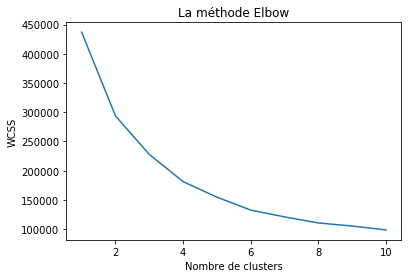

In [10]:
# 1 - On utilise la méthode elbow pour trouver le nombre optimal de clusters

from sklearn.cluster import KMeans
from sklearn import cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) #attribut inertia_ qui est en fait le calcul de wcss
plt.plot(range(1, 11), wcss) #plot(abscisse, ordonnée) => range(1,11) pour avoir chaque nb entre 1 et 10
plt.title('La méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

Cette méthode nous permet de se faire une idée sur le nombre optimal de classes que l'on doit avoir dans notre clusterisation.
Ici, nous retiendrons 4 et 6. Après des tests avec 4 ou 6 classes, nous retenons finalement une segmentation en 4 groupes.

In [11]:
# 2 - K-means 
kmeans = cluster.KMeans(n_clusters=4,init = 'k-means++',random_state=0)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

In [13]:
print(y_kmeans)

[3 2 1 2 2 0 3 2 2 2 2 3 1 3 0 0 3 2 0 1 1 2 3 0 3 1 1 3 1 3 3 3 3 0 3 3 3
 2 3 0 1 0 3 1 2 0 1 3 0 1 1 1 0 2 3 0 3 2 3 3 0 2 3 0 3 0 1 0 0 2 0 3 3 3
 3 3 0 2 3 0 3 2 0 0 3 1 1 3 1 2 3 1 1 1 3 2 2 3 1 3 0 0 3 2 0 2 3 1 0 2 0
 3 0 1 3 1 3 3 3 3 3 1 3 1 2 2 0 2 0 2 2 0 1]


In [14]:
# index triés des groupes
idk = np.argsort(kmeans.labels_)
# affichage des observations et leurs groupes
classe=pd.DataFrame(kmeans.labels_[idk],x.index[idk])

In [17]:
classe.head(5)

,0
41,0
131,0
126,0
117,0
106,0


In [18]:
# 3 - Fusion avec les données

clustering=pd.merge(data_pays_clustering,classe,left_index=True,right_index=True)
clustering.rename(columns={'EN.ATM.CO2E.GF.ZS' : 'CO2 emissions from gaseous fuel',
'EN.CO2.ETOT.ZS' : 'CO2 emissions from elec and heat prod',
'EN.ATM.CO2E.SF.ZS' : 'CO2 emissions from solid fuel',
'EN.CO2.TRAN.ZS' : 'CO2 emissions from transport',
'EG.USE.COMM.CL.ZS' : 'Alternative and nuclear energy',
'EN.CO2.BLDG.ZS' : 'CO2 emissions from buildings',
'EN.CO2.OTHX.ZS' : 'CO2 emissions from other sectors',
'EN.ATM.CO2E.LF.ZS' : 'CO2 emissions from liquid fuel',
'EG.USE.CRNW.ZS' : 'Combustible renewables and waste',
'EN.ATM.CO2E.PC' : 'emission co2 capita'},inplace=True)

In [19]:
clustering.head(5)

,Country Code,Country Name,emission co2 capita,CO2 emissions from gaseous fuel,CO2 emissions from elec and heat prod,CO2 emissions from solid fuel,CO2 emissions from transport,Alternative and nuclear energy,CO2 emissions from buildings,CO2 emissions from other sectors,CO2 emissions from liquid fuel,Combustible renewables and waste,0
1,ALB,Albania,1.978763,1.026299,2.912621,12.251443,59.951456,17.924206,8.495146,6.553398,67.543297,9.361381,3
2,DZA,Algeria,3.717410,50.820912,38.826975,0.375779,35.280241,0.042274,15.179370,2.367201,36.372349,0.011600,2
5,AGO,Angola,1.291328,1.666667,19.170984,0.000000,43.989637,2.954635,28.704663,0.362694,56.012658,48.765820,1
7,ARG,Argentina,4.746797,47.392070,38.038563,2.854164,24.167143,5.878946,14.463905,6.465360,46.164492,4.599746,2
8,ARM,Armenia,1.902759,80.636605,29.693487,0.000000,27.777778,27.513410,31.034483,0.383142,15.517241,1.145285,2


#    IV - INTERPRETATION

In [20]:
# On crée des indices de sur ou sous représentation basés sur la moyenne tous pays confondus
# (base 100 => si l'indice est égal à 100 pour une classe, cela veut dire que la moyenne de 
# la classe = moyenne tous pays confondus)

gb=clustering.groupby(kmeans.labels_)
interpret_groups = gb.mean() / clustering.mean() * 100
interpret_groups.rename(columns={'EN.ATM.CO2E.GF.ZS' : 'CO2 emissions from gaseous fuel',
'EN.CO2.ETOT.ZS' : 'CO2 emissions from elec and heat prod',
'EN.ATM.CO2E.SF.ZS' : 'CO2 emissions from solid fuel',
'EN.CO2.TRAN.ZS' : 'CO2 emissions from transport',
'EG.USE.COMM.CL.ZS' : 'Alternative and nuclear energy',
'EN.CO2.BLDG.ZS' : 'CO2 emissions from buildings',
'EN.CO2.OTHX.ZS' : 'CO2 emissions from other sectors',
'EN.ATM.CO2E.LF.ZS' : 'CO2 emissions from liquid fuel',
'EG.USE.CRNW.ZS' : 'Combustible renewables and waste',
'EN.ATM.CO2E.PC' : 'emission co2 capita'},inplace=True)

In [21]:
print(interpret_groups)

   emission co2 capita  CO2 emissions from gaseous fuel  \
0           114.590192                        59.928353   
1            10.699364                        32.602762   
2           182.925755                       259.996115   
3            92.274470                        69.830963   

   CO2 emissions from elec and heat prod  CO2 emissions from solid fuel  \
0                             141.683387                     290.949909   
1                              55.271179                      27.341241   
2                             118.796229                      36.030499   
3                              87.004229                      53.903944   

   CO2 emissions from transport  Alternative and nuclear energy  \
0                     56.141006                       98.456731   
1                    159.996116                       76.818176   
2                     70.001303                       47.792658   
3                    112.333982                      145.437

Note de lecture : Le tableau ci-dessus nous aide à interpréter les classes obtenues. En effet, lorsque nous avons un indice fort (>120) sur un indicateur pour une classe donnée, cela signifie que ce groupe présente un moyenne bien plus importante que la moyenne mondiale sur cet indicateur. Ici, par exemple, la classe 1 a un très fort indice sur l'indicateur "Combustible renewables and waste", il s'agit donc d'un groupe de pays avec une action concernant les énergies renouvelables.

In [22]:
# Nombre de pays par cluster

clustering["Country Name"].groupby(kmeans.labels_).count()

0    31
1    27
2    28
3    47
Name: Country Name, dtype: int64

Remarque : la segmentation permet d'avoir une répartition des pays dans les classes assez homogène

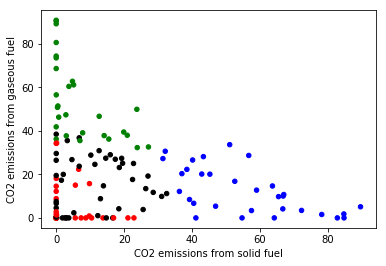

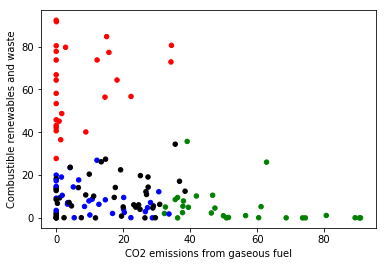

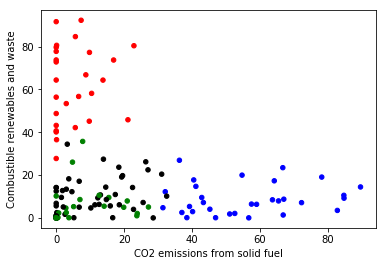

In [23]:
###################################
#    V - VISUALISATION
###################################

clustering["classe"]=clustering.iloc[:, -1].values

colors = {0:'blue', 1:'red', 2:'green', 3:'black'}

clustering.plot.scatter(x='CO2 emissions from solid fuel', y='CO2 emissions from gaseous fuel', c=clustering["classe"].apply(lambda x: colors[x]))
clustering.plot.scatter(x='CO2 emissions from gaseous fuel', y='Combustible renewables and waste', c=clustering["classe"].apply(lambda x: colors[x]))
clustering.plot.scatter(x='CO2 emissions from solid fuel', y='Combustible renewables and waste', c=clustering["classe"].apply(lambda x: colors[x]))


Remarque : Ces graphiques permettent d'illustrer graphiquement les conclusions obtenues via le tableau des indices en base 100. En effet, nous pouvons aisément voir que le groupe rouge (1) est le groupe avec une grande importance des énergies renouvelables. Le groupe vert (2) est lui beaucoup plus porté sur les énergies gazeuses, là où le groupe bleu (0) est lui plus sur les énergies solides.

Nous avons donc 4 groupes bien distincts en terme de caractéristiques environnementales.